#### Festlegung für die Darstellung von interaktiven Graphiken innerhalb des Notebooks

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Import der notwendigen Pakete und Module

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import scipy
from scipy.io import wavfile
from pylab import *
from scipy.fftpack import fft, ifft
from IPython.display import Audio

import dsv.dsvorg as do
import dsv.data_resample as resample
import dsv.bsfilter as bsfilter
import dsv.classes as dc
import dsv.tproc_new as tp

[Table of Contents](table_of_contents.ipynb)

##### Protokoll
## Mischen von Schall - Bearbeitung von Schall im Frequenzbereich

<table align="left" width="400">
    <colgroup>
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 50%;">
    </colgroup>
  <tr>
    <th>Name</th>
    <th>Vorname</th> 
  </tr>
  <tr>
    <td> Flach</td>
    <td> Gudrun</td>
  </tr>
</table>

Schallereignisse in Hörspielen und Filmen umfassen oft eine Mischung aus Sprachsignalen und Geräuschen, die eine Umgebungsatmosphäre vermitteln sollen. Bei der Mischung sind 2 Ziele zu erreichen:
- möglichst hohe Sprachverständlichkeit
- möglichst authentische Geräuschumgebung.

In den folgenden Aufgaben sollen Sie aus den zur Verfügung stehenden Sprach- und Umgebungsgeräuschaufnahmen Mischungen erzeugen, die diese Ziele erfüllen.

### Bearbeitung von Schall im Frequenzbereich
Zur Bearbeitung von Schall im Frequenzbereich werden Nutz- und Umgebungsgeräuschsignale mit gleicher Abtastfrequenz und gleicher Dauer verwendet. 
Der erste Teil der Aufgabe besteht darin, das Umgebungsgeräuschsignal in seinem Frequenzgehalt so zu verändern, dass die Signalcharakteristik erhalten bleibt und die Sprache des gemischten Signals gut verständlich ist. Dazu stehen folgende Dateien zur Verfügung:
- `dsv1_frau_clean_trim.wav` (1)
- `dsv1_kind_trim.wav`       (2)
- `dsv1_gaense_trim.wav`     (3)
- `dsv1_rauschen_trim.wav`   (4)
- `dsv1_wasser_trim.wav`     (5)

Im zweiten Teil soll versucht werden, einen im Nutzsignal enthaltenen "Störanteil" zu beseitigen. Dazu stehen folgende Dateien zur Verfügung:
- `dsv1_gs_stoer.wav` (6)
- `dsv1_at_stoer.wav` (7)

#### Bearbeitung von Signalmischungen
Hören Sie zunächst die zur Verfügung stehenden Signale unbearbeitet an.

#### <font color="#FF0000">Eingabezelle 1</font>

In [3]:
file = 'dsv1_frau_clean_trim'

In [4]:
fs, data = do.load_data(file)
Audio(data = data, rate = fs)

### <font color="#008000">Aufgabe 1</font>

Untersuchen Sie zunächst den Frequenzgehalt der Signale 1 bis 5. Für das jeweils ausgewählte Signal wird das Spektrum und das Kurzzeitspektrum ermittelt. 

Tragen Sie in der  **Tabelle Frequenzschwerpunkte** maximal 2 Frequenzgebiete mit großer Amplitude für die angegebenen Signale ein! 

#### <font color="#FF0000">Eingabezelle 2</font>

In [5]:
file1 = 'dsv1_frau_clean_trim'

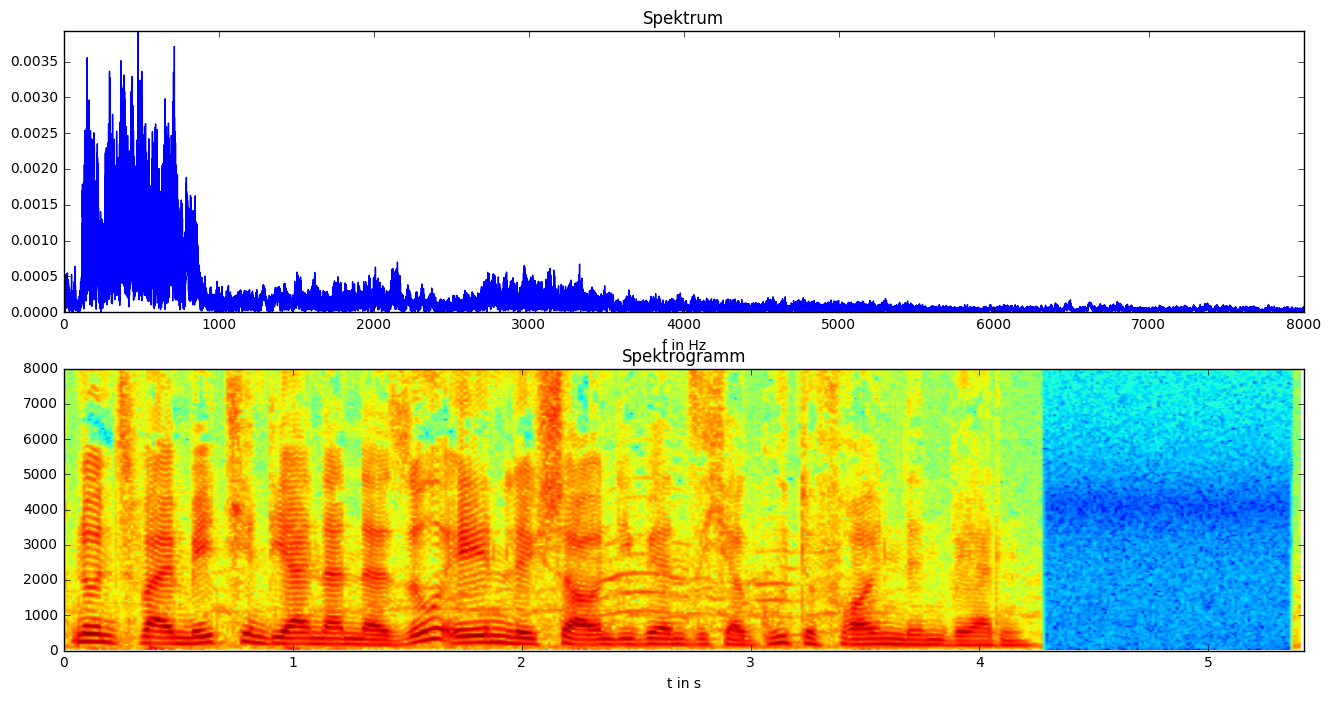

In [6]:
fig = plt.figure(figsize=(16,8))
fs, data_in =do.load_data(file1)
fig.add_subplot(211)
do.spektrum(fs, data_in)
fig.add_subplot(212)
do.spektrogramm(fs, data_in)

##### Protokoll
#### Aufgabe 1 - Tabelle Frequenzschwerpunkte
<table>
    <colgroup>
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 20%;">
    </colgroup>
  <tr>
    <th>File</th>
    <th>$f_{min1}$</th> 
    <th>$f_{max1}$</th> 
    <th>$f_{min2}$</th> 
    <th>$f_{max2}$</th> 
  </tr>
  <tr>
    <th>dsv1_frau_clean_trim.wav</th>
    <th> </th> 
    <th> </th> 
    <th> </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_kind_trim.wav </th>
    <th> </th> 
    <th> </th> 
    <th> </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_gaense_trim.wav</th>
    <th> </th> 
    <th> </th> 
    <th> </th> 
    <th> </th> 
  </tr>
</table>

### <font color="#008000">Aufgabe 2</font>

Mischen Sie die Nutzsignale (1,2)  mit den unbearbeiteten Umgebungsgeräuschsignalen (3,4,5). Charakterisieren Sie den Höreindruck in der **Tabelle Mischung(unbearbeitet)**.

#### <font color="#FF0000">Eingabezelle 3</font>

In [ ]:
file1 = 'dsv1_kind_trim'
file2 = 'dsv1_gaense_trim'

In [ ]:
data = do.misch(file1,file2)
Audio(data = data, rate = 44100)

##### Protokoll
#### Aufgabe 2 - Tabelle Mischung (unbearbeitet)
<table>
    <colgroup>
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 60%;">
    </colgroup>
  <tr>
    <th>File</th>
    <th>Umgebungsgeräuschsignal</th> 
    <th>Höreindruck</th> 
  </tr>
  <tr>
    <th>dsv1_frau_clean_trim.wav</th>
    <th>dsv1_gaense_trim.wav </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_frau_clean_trim.wav</th>
    <th>dsv1_wasser_trim.wav </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_frau_clean_trim.wav</th>
    <th>dsv1_rauschen_trim.wav </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_kind_trim.wav</th>
    <th>dsv1_gaense_trim.wav </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_kind_trim.wav</th>
    <th>dsv1_wasser_trim.wav </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_kind_trim.wav</th>
    <th>dsv1_rauschen_trim.wav </th> 
    <th> </th> 
  </tr>
</table>

#### Entwurf eines geeigneten Filters
Für eine Verbesserung des Höreindruckes sollen sich Nutzsignal und Umgebungsgeräusch im Spektrum möglichst wenig überlappen. Wenn eine solche Überlappung existiert (anhand der Spektren erkennbar), sollte das Umgebungsgeräusch mit geeigneten Filtern so bearbeitet werden, dass der Signalcharakter erhalten bleibt und in der Mischung das Nutzsignal besser erkennbar ist.
Bearbeiten Sie die Umgebungsgeräuschsignale durch Anwendung geeigneter Filter.

#### Erzeugen des Filters
Für die Bearbeitung der Umgebungsgräusche stehen folgende Filtertypen zur Verfügung:
- Tiefpass (`typ='lp'`)
- Hochpass (`typ='hp'`)
- Bandpass (`typ='bp'`)
- Bandsperre (`typ='bs'`)

### <font color="#008000">Aufgabe 3</font>

Ermitteln Sie für die untersuchten Umgebungsgräusche je maximal 2 geeignete Filter, die nacheinander auf das Signal angewendet werden und tragen Sie deren Parameter in die **Tabelle Filterparameter** ein. Nutzen Sie zum Filterentwurf die folgende Zelle, ermitteln die möglichen Maximalwerte der Filterordnung (`order`)!

#### <font color="#FF0000">Eingabezelle 4</font>

In [ ]:
fgu = 175
fgo = 225
order = 3
typ = 'bs'

In [ ]:
bsfilter.filter_fgang(fgu=fgu, fgo=fgo, order=order, typ=typ)
plt.show()

##### Protokoll
#### Aufgabe 3 -Tabelle Filterparameter
<table>
    <colgroup>
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
    </colgroup>
  <tr>
    <th>File</th>
    <th>Typ</th> 
    <th>$f_{gu}$</th> 
    <th>$f_{go}$</th>
    <th>Ordnung</th>
    <th>Typ</th> 
    <th>$f_{gu}$</th> 
    <th>$f_{go}$</th>
    <th>Ordnung</th> 
  </tr>
  <tr>
    <th>dsv1_gaense_trim.wav</th>
    <th> </th> 
    <th> </th> 
    <th> </th>
    <th> </th>
    <th> </th> 
    <th> </th> 
    <th> </th>
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_wasser_trim.wav</th>
    <th> </th> 
    <th> </th> 
    <th> </th>
    <th> </th>
    <th> </th> 
    <th> </th> 
    <th> </th>
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_rauschen_trim.wav</th>
    <th> </th> 
    <th> </th> 
    <th> </th>
    <th> </th>
    <th> </th> 
    <th> </th> 
    <th> </th>
    <th> </th> 
  </tr>
</table>

#### Anwenden des bzw. der parametrierten Filter auf das Signal
Wenden Sie die Filter auf das Umgebungsgeräusch an. Nach jeder Filterung wird an den Filename die Erweiterung `_filt` angehängt. Beachten Sie dies bei mehrfacher Filterung. Verändern Sie die Filterparameter  `fgu`, `fgo`, `order` und `typ` .

#### <font color="#FF0000">Eingabezelle 5</font>

In [ ]:
file = 'dsv1_gaense_trim'
fgu = 150
fgo = 850
order = 4
typ = 'bs'

In [ ]:
fs, data_in = do.load_data(file)
data_out = bsfilter.filter_appl(fs, data_in, fgu=fgu, fgo=fgo, order=order, typ=typ)
do.write_data(file +'_filt', data_out)

Vergleich gefiltertes und ungefiltertes Signal

In [ ]:
fs, data_in = do.load_data(file)
fs, data_in_filt = do.load_data(file + '_filt')
data = np.append(data_in_filt, data_in)
do.spektrogramm(fs, data)
Audio(data = data, rate = fs)

#### Mischen von Nutzsignal und gefiltertem Umgebungsgeräusch

#### <font color="#FF0000">Eingabezelle 6</font>

In [ ]:
file1 = 'dsv1_kind_trim'
file2 = 'dsv1_gaense_trim_filt'

In [ ]:
data_bearbeitet = do.misch(file1,file2)
Audio(data=data_bearbeitet, rate=44100)

#### Vergleich ungefilterte und gefilterte Mischung


### <font color="#008000">Aufgabe 4</font>

Im Folgenden können Sie die beiden Signalmischungen vergleichen. Tragen Sie in der **Tabelle Mischung (bearbeitet)** die verwendete Umgebungsgeräuschsignaldatei (durch Anhängen von `_filt...`) ein und beschreiben Sie den Höreindruck.

#### <font color="#FF0000">Eingabezelle 7</font>

In [ ]:
file1 = 'dsv1_frau_clean_trim'
file2 = 'dsv1_gaense_trim'
file3 = 'dsv1_gaense_trim_filt'

In [ ]:
data_unbearbeitet = do.misch(file1,file2)
data_bearbeitet = do.misch(file1,file3)
data = np.append(data_unbearbeitet, data_bearbeitet)
Audio(data = data, rate = fs)

##### Protokoll
#### Aufgabe 4 - Tabelle Mischung (bearbeitet)
<table>
    <colgroup>
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 60%;">
    </colgroup>
  <tr>
    <th>Nutzsignal</th>
    <th>Umgebungsgeräuschsignal</th> 
    <th>Höreindruck</th> 
  </tr>
  <tr>
    <th>dsv1_frau_clean_trim.wav</th>
    <th> dsv1_gaense_trim<font color="#FF0000"> ? </font>.wav </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_frau_clean_trim.wav</th>
    <th>dsv1_wasser_trim<font color="#FF0000"> ? </font>.wav </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_frau_clean_trim.wav </th>
    <th> dsv1_rauschen_trim<font color="#FF0000"> ? </font>.wav</th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_kind_trim.wav </th>
    <th> dsv1_gaense_trim<font color="#FF0000"> ? </font>.wav</th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_kind_trim.wav </th>
    <th> dsv1_wasser_trim<font color="#FF0000"> ? </font>.wav</th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_kind_trim.wav </th>
    <th> dsv1_rauschen_trim<font color="#FF0000"> ? </font>wav</th> 
    <th> </th> 
  </tr>
</table>

#### Entfernen von Störungen aus einem Signal
Wenn ein Nutzsignal Störungen enthält, können diese durch eine Filterung entfernt werden. Dies gelingt jedoch nur dann, wenn diese Anteile im Frequenzbereich trennbar sind. 

### <font color="#008000">Aufgabe 5</font>
Versuchen Sie die gestörten Signale
- `dsv1_at_stoer.wav`
- `dsv1_gs_stoer.wav`

durch geeignete Filterung zu rekonstruieren. Testen Sie für das erste Signal 2 verschiedene Entstörfilter. Für das zweite Signal ist ein Entstörfilter zu entwerfen. Tragen Sie deren Parameter und den Höreindruck in die **Tabelle Entstörfilter** ein. 

#### <font color="#FF0000">Eingabezelle 8</font>

In [ ]:
file = 'dsv1_gs_stoer_filt'

In [ ]:
fs, data = do.load_data(file)
Audio(data=data, rate=fs)

In [ ]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(211)
do.spektrum(fs, data)
fig.add_subplot(212)
do.spektrogramm(fs, data)

#### <font color="#FF0000">Eingabezelle 9</font>

In [ ]:
fgu = 175
fgo = 225
order = 3
typ = 'bs'

In [ ]:
data_out = bsfilter.filter_appl(fs, data, fgu=fgu, fgo=fgo, order=order, typ=typ)
do.write_data(file +'_filt', data_out)

##### Protokoll
#### Aufgabe 5 - Tabelle Entstörfilter
<table>
    <colgroup>
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 10%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Signal</th>
    <th>Filtertyp</th> 
    <th>$f_{gu}$</th> 
    <th>$f_{go}$</th> 
    <th>Ordnung</th> 
    <th>Höreindruck</th> 
  </tr>
  <tr>
    <th>dsv1_at_stoer.wav</th>
    <th> </th> 
    <th> </th> 
    <th> </th> 
    <th> </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_at_stoer.wav</th>
    <th> </th> 
    <th> </th> 
    <th> </th> 
    <th> </th> 
    <th> </th> 
  </tr>
  <tr>
    <th>dsv1_gs_stoer.wav</th>
    <th> </th> 
    <th> </th> 
    <th> </th> 
    <th> </th> 
    <th> </th> 
  </tr>
</table>

In [5]:
nb_in = 'C:\\WinPython-neu\\notebooks\\DSV-MI\\DSM4\\DSVMI_part5.ipynb'
nb_out = 'C:\\WinPython-neu\\notebooks\\DSV-MI\\DSM4\Protokoll_p5.ipynb'
tp.protokoll(nb_in,nb_out)